In [18]:
#USING CODE FROM P1

import numpy as np
from sklearn import datasets
from sklearn import tree
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target
y = np.where(y==2, 1, y)

setosa = X[y==0]
not_setosa = X[y==1]
X_training = np.concatenate((setosa[:40],not_setosa[:80]),axis=0)
X_testing = np.concatenate((setosa[40:],not_setosa[80:]),axis=0)
y_training = np.concatenate((np.zeros(40, dtype=int), np.ones(80,dtype=int)))
y_testing = np.concatenate((np.zeros(10,dtype=int), np.ones(20,dtype=int)))

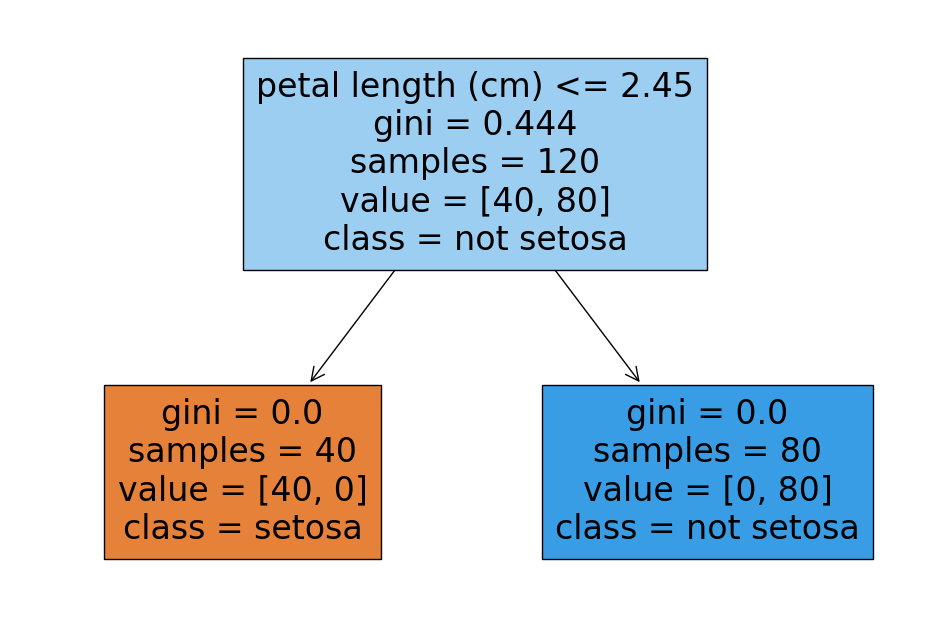

In [19]:
#PART B
#build a decision tree on training set and plot it
#use gini index

dt = tree.DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X_training, y_training)

plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True, feature_names=iris.feature_names,
          class_names=['setosa', 'not setosa'])

dotfile = open("dt.dot", 'w')
tree.export_graphviz(dt, out_file=dotfile, feature_names=iris.feature_names)
dotfile.close()

In [20]:
#PART C
#convert into IF-THEN
print("IF-THEN rules:")
print(tree.export_text(dt, feature_names=iris.feature_names))

IF-THEN rules:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- class: 1



In [21]:
#PART D
# Test decision tree on test set
predicted_test = dt.score(X_testing, y_testing)
test_error = 1 - predicted_test
print("Test error: ")
print(test_error)

Test error: 
0.0
